## 정규화, 히트맵, 상관관계 보기!

In [1]:
import pandas as pd


In [2]:
subway=pd.read_csv('../Data/FinalDataset/2022-01-01 ~2022-12_31_dataset.csv')
subway.head()
subway=subway[subway['역사코드'] == 2711]
# subway.columns


## 히트맵 확인!

In [3]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 26395
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  730 non-null    int64  
 1   연번          730 non-null    int64  
 2   수송일자        730 non-null    object 
 3   호선          730 non-null    int64  
 4   역사코드        730 non-null    int64  
 5   역명          730 non-null    object 
 6   승하차구분       730 non-null    object 
 7   05          730 non-null    int64  
 8   06          730 non-null    int64  
 9   07          730 non-null    int64  
 10  08          730 non-null    int64  
 11  09          730 non-null    int64  
 12  10          730 non-null    int64  
 13  11          730 non-null    int64  
 14  12          730 non-null    int64  
 15  13          730 non-null    int64  
 16  14          730 non-null    int64  
 17  15          730 non-null    int64  
 18  16          730 non-null    int64  
 19  17          730 non-null    int6

In [4]:
# 주중주말 데이터 int로 변경
subway['주중주말'] = subway['주중주말'].map({'DAY': '0', 'SAT': '1'})
subway.주중주말=subway.주중주말.astype(int)
subway.주중주말.info()

<class 'pandas.core.series.Series'>
Index: 730 entries, 0 to 26395
Series name: 주중주말
Non-Null Count  Dtype
--------------  -----
730 non-null    int64
dtypes: int64(1)
memory usage: 11.4 KB


In [5]:
# 데이터프레임의 모든 float 타입 열을 int 타입으로 변환
def convert_float_to_int(df):
    
    float_columns = df.select_dtypes(include=['float64', 'float32']).columns
    df[float_columns] = df[float_columns].astype(int)
    return df

convert_float_to_int(subway)


,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,6,7,20,...,10,9,9,12,10,9,8,4,6,0
1,1,426,2022-01-01,7,2711,장암,하차,2,18,9,...,10,9,9,12,10,9,8,4,6,0
2,2,969,2022-01-02,7,2711,장암,승차,8,15,21,...,10,9,9,12,10,9,8,4,6,0
3,3,970,2022-01-02,7,2711,장암,하차,2,9,20,...,10,9,9,12,10,9,8,4,6,0
4,4,1513,2022-01-03,7,2711,장암,승차,61,273,597,...,10,9,9,12,10,9,8,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,26391,190778,2022-12-16,7,2711,장암,하차,6,38,30,...,6,7,8,9,7,7,8,7,7,0
26392,26392,194599,2022-12-23,7,2711,장암,승차,54,291,697,...,6,7,8,9,7,7,8,7,7,0
26393,26393,194600,2022-12-23,7,2711,장암,하차,7,29,48,...,6,7,8,9,7,7,8,7,7,0
26394,26394,198417,2022-12-30,7,2711,장암,승차,58,220,631,...,6,7,8,9,7,7,8,7,7,0


In [6]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [7]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 26395
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  730 non-null    int64 
 1   연번          730 non-null    int64 
 2   수송일자        730 non-null    object
 3   호선          730 non-null    int64 
 4   역사코드        730 non-null    int64 
 5   역명          730 non-null    object
 6   승하차구분       730 non-null    object
 7   05          730 non-null    int64 
 8   06          730 non-null    int64 
 9   07          730 non-null    int64 
 10  08          730 non-null    int64 
 11  09          730 non-null    int64 
 12  10          730 non-null    int64 
 13  11          730 non-null    int64 
 14  12          730 non-null    int64 
 15  13          730 non-null    int64 
 16  14          730 non-null    int64 
 17  15          730 non-null    int64 
 18  16          730 non-null    int64 
 19  17          730 non-null    int64 
 20  18          7

             요일        년도         월        주차     공휴일여부      주중주말  역사코드  \
요일     1.000000  0.000305  0.012860  0.006934  0.105618  0.405231   NaN   
년도     0.000305  1.000000  0.118967 -0.125448  0.149680  0.030255   NaN   
월      0.012860  0.118967  1.000000  0.966496  0.014289  0.010564   NaN   
주차     0.006934 -0.125448  0.966496  1.000000 -0.009977 -0.001892   NaN   
공휴일여부  0.105618  0.149680  0.014289 -0.009977  1.000000  0.060228   NaN   
주중주말   0.405231  0.030255  0.010564 -0.001892  0.060228  1.000000   NaN   
역사코드        NaN       NaN       NaN       NaN       NaN       NaN   NaN   
05     0.057461  0.061446  0.115413  0.106614  0.171776  0.055849   NaN   
06     0.019251  0.067846  0.106718  0.100099  0.200027  0.113815   NaN   
07     0.017729  0.058748  0.066702  0.060814  0.175491  0.104467   NaN   
08     0.038176  0.065841  0.066906  0.059275  0.183951  0.088693   NaN   
09     0.047819  0.065219  0.219704  0.203374  0.132663 -0.027167   NaN   
10     0.079113  0.004051

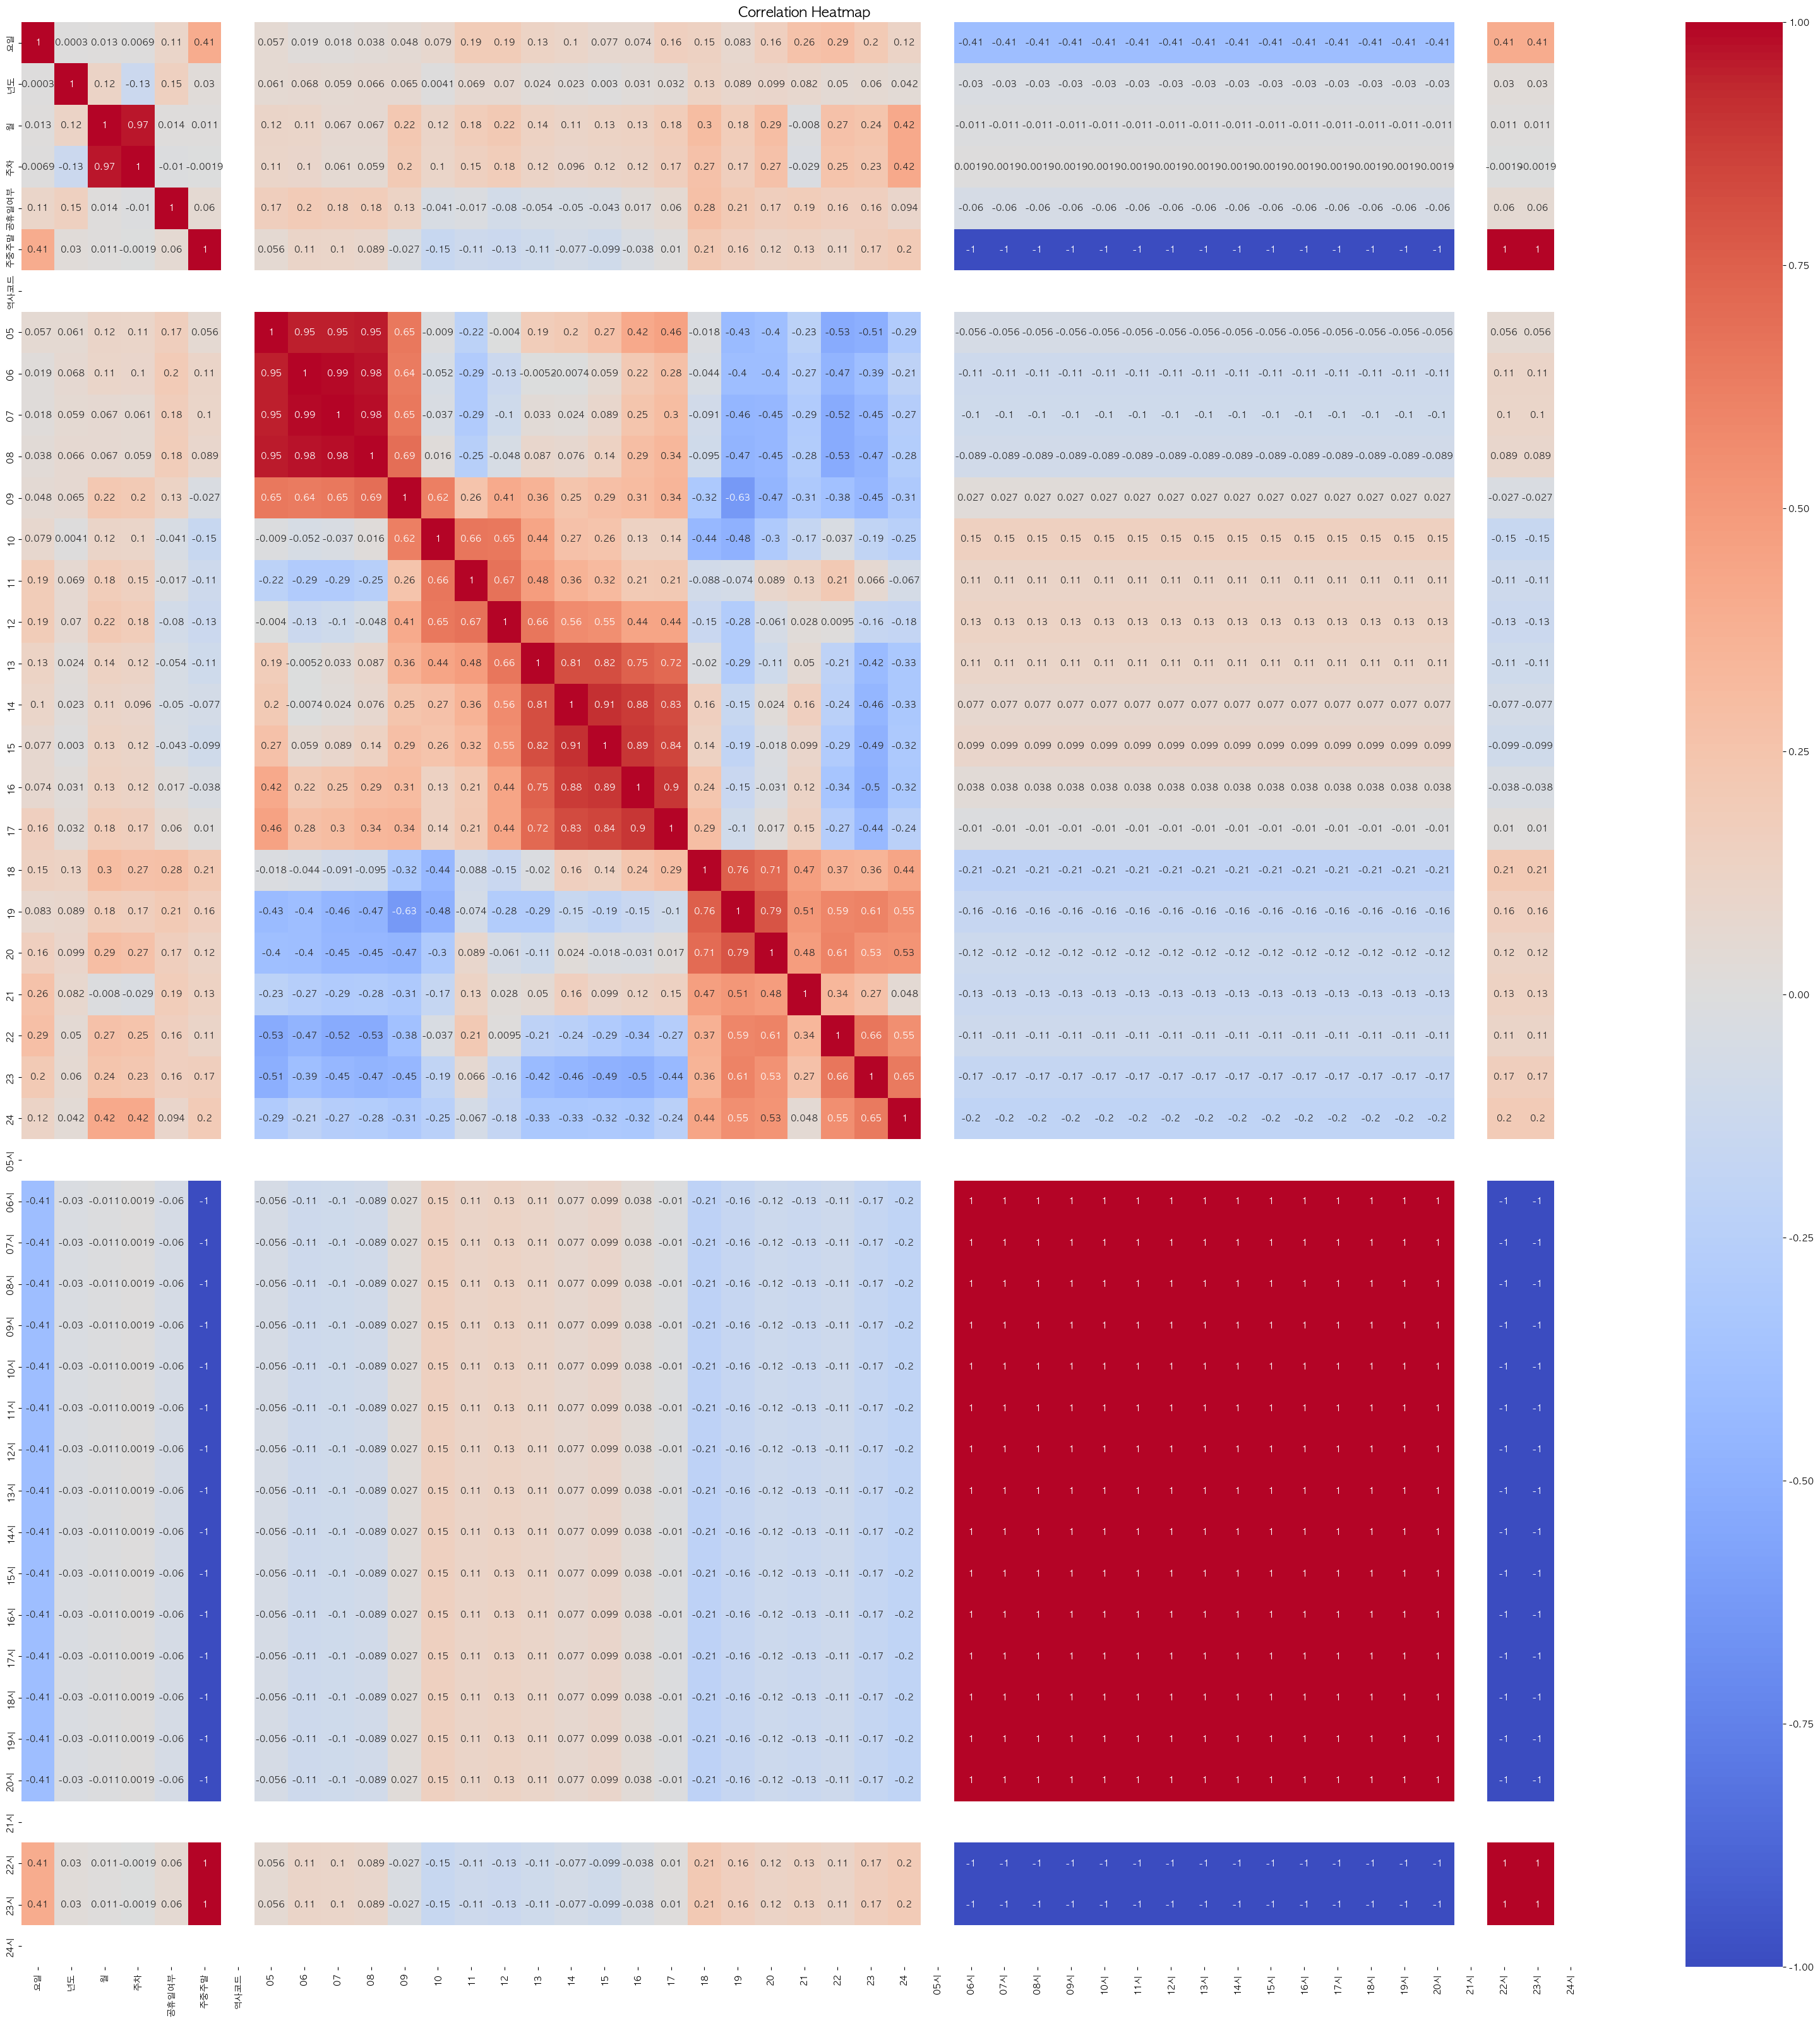

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#int64인 값만 가져와서 column 생성( 너무 많은 데이터가 뽑아져서 컬럼 하나하나 쓰기)
# int_columns = subway.select_dtypes(include=['int64'])
int_columns = subway[['요일', '년도', '월', '주차', '공휴일여부', '주중주말', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]
# int_columns = subway[['Unnamed: 0', '연번', '호선', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부', '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]

int_columns.head()
# 상관관계 계산
corr = int_columns.corr()

print(corr)
# 히트맵 그리기
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# #히트맵
# sns.heatmap(
#     table,
#     annot=True,
#     fmt='d',
#     cmap='RdBu',#YlGnBu
#     linewidths=1.5,
#     cbar=True
# )

# plt.show()

## 히트맵으로 알수 있는점


## 배차시간, 승,하차수 정규화

In [9]:
subway.columns

Index(['Unnamed: 0', '연번', '수송일자', '호선', '역사코드', '역명', '승하차구분', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부',
       '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시',
       '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시',
       '24시'],
      dtype='object')

In [10]:
# # 승,하차인원 정규화
# from sklearn.preprocessing import MinMaxScaler

# # 정규화할 컬럼 선택 (05 ~ 24)
# cols_to_normalize_1 = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24']



# # 정규화할 컬럼 데이터 추출
# data_to_normalize = subway[cols_to_normalize_1]

# # MinMaxScaler 객체 생성
# scaler = MinMaxScaler()

# # 정규화
# data_normalized = scaler.fit_transform(data_to_normalize)

# # 정규화된 데이터를 원본 데이터프레임에 덮어쓰기
# subway[cols_to_normalize_1] = data_normalized

In [11]:
# # 배차대수 정규화
# from sklearn.preprocessing import MinMaxScaler

# # # 정규화할 컬럼 선택 (05 ~ 24)
# # cols_to_normalize_1 = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24']

# # 정규화할 컬럼 선택 (05 ~ 24)
# cols_to_normalize_2 = ['05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']

# # 두 리스트 합치기
# # cols_to_normalize = cols_to_normalize_1 + cols_to_normalize_2

# # 정규화할 컬럼 데이터 추출
# data_to_normalize = subway[cols_to_normalize_2]

# # MinMaxScaler 객체 생성
# scaler = MinMaxScaler()

# # 정규화
# data_normalized = scaler.fit_transform(data_to_normalize)

# # 정규화된 데이터를 원본 데이터프레임에 덮어쓰기
# subway[cols_to_normalize_2] = data_normalized

In [12]:
subway['21시'].max()

8

In [13]:
subway['20시'].max()


9

## 배차시간, 승,하차수 표준화

In [14]:
# # 승,하차인원 표준화
# from sklearn.preprocessing import StandardScaler

# # 표준화할 컬럼 선택 (05 ~ 24)
# cols_to_scale = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24']

# # 표준화할 컬럼 데이터 추출
# data_to_scale = subway[cols_to_scale]

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # 표준화
# data_scaled = scaler.fit_transform(data_to_scale)

# # 표준화된 데이터를 원본 데이터프레임에 덮어쓰기
# subway[cols_to_scale] = data_scaled

In [15]:
# # 승,하차인원 표준화
# from sklearn.preprocessing import StandardScaler

# # 표준화할 컬럼 선택 (05 ~ 24)
# cols_to_scale = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24','05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']




# # 표준화할 컬럼 데이터 추출
# data_to_scale = subway[cols_to_scale]

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # 표준화
# data_scaled = scaler.fit_transform(data_to_scale)

# # 표준화된 데이터를 원본 데이터프레임에 덮어쓰기
# subway[cols_to_scale] = data_scaled

In [16]:
subway['05'].describe()



count    730.000000
mean      27.715068
std       28.063194
min        0.000000
25%        5.000000
50%       10.000000
75%       56.000000
max       98.000000
Name: 05, dtype: float64

In [17]:
subway.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,6,7,20,...,10,9,9,12,10,9,8,4,6,0
1,1,426,2022-01-01,7,2711,장암,하차,2,18,9,...,10,9,9,12,10,9,8,4,6,0
2,2,969,2022-01-02,7,2711,장암,승차,8,15,21,...,10,9,9,12,10,9,8,4,6,0
3,3,970,2022-01-02,7,2711,장암,하차,2,9,20,...,10,9,9,12,10,9,8,4,6,0
4,4,1513,2022-01-03,7,2711,장암,승차,61,273,597,...,10,9,9,12,10,9,8,4,6,0


## 정규화,표준화 후 HeatMap

In [18]:
subway.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,6,7,20,...,10,9,9,12,10,9,8,4,6,0
1,1,426,2022-01-01,7,2711,장암,하차,2,18,9,...,10,9,9,12,10,9,8,4,6,0
2,2,969,2022-01-02,7,2711,장암,승차,8,15,21,...,10,9,9,12,10,9,8,4,6,0
3,3,970,2022-01-02,7,2711,장암,하차,2,9,20,...,10,9,9,12,10,9,8,4,6,0
4,4,1513,2022-01-03,7,2711,장암,승차,61,273,597,...,10,9,9,12,10,9,8,4,6,0


In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# #int64인 값만 가져와서 column 생성( 너무 ㅁ낳은 데이터가 뽑아져서 컬럼 하나하나 쓰기)
# # int_columns = subway.select_dtypes(include=['int64'])
# int_columns = subway[['요일', '년도', '월', '주차', '공휴일여부', '주중주말', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]
# # int_columns = subway[['Unnamed: 0', '연번', '호선', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부', '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]

# int_columns.head()
# # 상관관계 계산
# corr = int_columns.corr().T

# print(corr)
# # 히트맵 그리기
# plt.figure(figsize=(40, 40))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap', fontsize=16)
# plt.show()

# # #히트맵
# # sns.heatmap(
# #     table,
# #     annot=True,
# #     fmt='d',
# #     cmap='RdBu',#YlGnBu
# #     linewidths=1.5,
# #     cbar=True
# # )

# # plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
#, '수송일자', '역명', '승하차구분''주중주말','공휴일여부',
# 특성 변수(X) 컬럼 선택
features = [ '요일', '년도', '월', '주차', '공휴일여부', '주중주말', '역사코드', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
X = subway[features]

# 타깃 변수(y) 컬럼 선택
targets = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
y = subway[targets]
#
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature 변경(Train_Test)


In [21]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# #, '수송일자', '역명', '승하차구분''주중주말','공휴일여부',
# # 특성 변수(X) 컬럼 선택
# features = [ '요일', '주중주말',  '11시', '12시', '13시', '14시', '15시', '16시']
# X = subway[features]

# # 타깃 변수(y) 컬럼 선택
# targets = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
# y = subway[targets]

# # 학습 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# #, '수송일자', '역명', '승하차구분''주중주말','공휴일여부',
# # 특성 변수(X) 컬럼 선택
# features = [ '요일', '주중주말',  '11시', '12시', '13시', '14시', '15시', '16시']
# X = subway[features]

# # 타깃 변수(y) 컬럼 선택
# targets = ['11', '12', '13', '14', '15', '16']
# y = subway[targets]

# # 학습 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

model = MultiOutputRegressor(Ridge()).fit(X_train, y_train)
# regr.predict(X_test)
y_pred = model.predict(X_test)
# print(y_test.shape)

xx = pd.DataFrame(y_test).iloc[0,:]
yy = pd.DataFrame(y_pred).iloc[0,:]

xx.head()


result = np.column_stack(
    [pd.DataFrame(y_test).iloc[0,:],pd.DataFrame(y_pred).iloc[0,:]]
)
result

# result

# for i, j in zip(y_pred[:,1],y_test[:,1]):
#     print(i,j)
# 각 출력에 대한 R^2 점수 계산
# for i in range(y_test.shape[1]):
#     print(y_test[:, i], y_pred[:, i])
    # score = r2_score(y_test[:, i], y_pred[:, i])
    # print(f"Output {i} R^2 score: {score:.4f}")

array([[ 40.        ,  32.89270024],
       [ 42.        , 120.07696567],
       [ 75.        , 264.15511392],
       [114.        , 192.51989647],
       [146.        , 119.95976455],
       [102.        ,  91.76745138],
       [105.        ,  85.32516658],
       [134.        ,  90.63488443],
       [148.        ,  80.18709916],
       [159.        ,  84.4781498 ],
       [182.        ,  95.67922449],
       [175.        , 103.3600991 ],
       [181.        , 111.68599933],
       [103.        , 104.57886746],
       [ 63.        ,  77.9160647 ],
       [ 55.        ,  50.48549052],
       [ 40.        ,  32.02066615],
       [ 23.        ,  25.83526236],
       [  6.        ,  15.16439658],
       [  0.        ,   4.35955981]])

In [24]:
# 의사결정나무
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 예측값과 실제값 비교
for i, target in enumerate(targets):
    print(f"{target} 컬럼 예측값 vs 실제값:")
    print(f"예측값: {y_pred[:, i][:5]}") # 예측값 중 처음 5개만 출력
    print(f"실제값: {y_test[target].values[:5]}\n") # 실제값 중 처음 5개만 출력
    # # 퍼센트 차이 계산
    mape = mean_absolute_percentage_error(y_test[target], y_pred[:, i])
    print(f"{target} 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: {mape * 100:.2f}%\n")

05 컬럼 예측값 vs 실제값:
예측값: [ 2.  4.  2. 72. 62.]
실제값: [40 57 15  9  7]

05 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 90997389731116768.00%

06 컬럼 예측값 vs 실제값:
예측값: [ 53.  39.  34. 310. 316.]
실제값: [ 42 283  30  58  55]

06 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 201.67%

07 컬럼 예측값 vs 실제값:
예측값: [ 53.  38.  36. 635. 764.]
실제값: [ 75 618  39  58  61]

07 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 489.45%

08 컬럼 예측값 vs 실제값:
예측값: [ 72.  42.  80. 453. 416.]
실제값: [114 374  62  79  79]

08 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 255.77%

09 컬럼 예측값 vs 실제값:
예측값: [132.  36. 123. 121. 192.]
실제값: [146 109  80  85  48]

09 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 108.82%

10 컬럼 예측값 vs 실제값:
예측값: [168.  49. 104.  76.  77.]
실제값: [102  53  63  42  33]

10 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 61.14%

11 컬럼 예측값 vs 실제값:
예측값: [144.  37. 104.  41.  79.]
실제값: [105  53  75  52  60]

11 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 25.45%

12 컬럼 예측값 vs 실제값:
예측값: [119.  44.  90.  72.  73.]
실제값: [134  72  58  57  61]

12 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 23.62%

13 컬럼 예측값 vs 실제값:
예측값: [85. 68. 43. 75. 60.]
실제값: [148  68  90 

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# RandomForest 모델 초기화
model = RandomForestRegressor()

# 모델 훈련
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 예측값과 실제값 비교
for i, target in enumerate(targets):
    print(f"{target} 컬럼 예측값 vs 실제값:")
    print(f"예측값: {y_pred[:, i][:5]}")  # 예측값 중 처음 5개만 출력
    print(f"실제값: {y_test[target].values[:5]}\n")  # 실제값 중 처음 5개만 출력
    # 퍼센트 차이 계산
    mape = mean_absolute_percentage_error(y_test[target], y_pred[:, i])
    print(f"{target} 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: {mape * 100:.2f}%\n")


05 컬럼 예측값 vs 실제값:
예측값: [17.46083333 15.76833333  4.50833333 62.21466667 52.1075    ]
실제값: [40 57 15  9  7]

05 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 83889090808496752.00%

06 컬럼 예측값 vs 실제값:
예측값: [ 47.31416667  83.335       30.89566667 265.08533333 269.6925    ]
실제값: [ 42 283  30  58  55]

06 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 172.66%

07 컬럼 예측값 vs 실제값:
예측값: [ 67.5025     179.77916667  36.905      555.94666667 627.4675    ]
실제값: [ 75 618  39  58  61]

07 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 416.43%

08 컬럼 예측값 vs 실제값:
예측값: [ 96.13666667 116.225       77.392      390.708      362.6125    ]
실제값: [114 374  62  79  79]

08 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 214.85%

09 컬럼 예측값 vs 실제값:
예측값: [129.62333333  57.68166667 125.79366667 113.08333333 166.5475    ]
실제값: [146 109  80  85  48]

09 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 93.17%

10 컬럼 예측값 vs 실제값:
예측값: [144.305       51.61666667 107.419       73.12        71.4225    ]
실제값: [102  53  63  42  33]

10 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 52.36%

11 컬럼 예측값 vs 실제값:
예측값: [129.73333333  40.535       94.78